In [ ]:
%load_ext cython

In [ ]:
%%cython -a
def f():
    # char is an integer type, same (in that regard) as int, short and other integer types. char just happens to be the smallest integer type
    cdef unsigned char index = 3 # small int
    cdef int age = 5000
    cdef float height = 1.4
    cdef long long depth = 99999999999
    cdef bint valid = False
    return index, age, height, depth, valid

In [ ]:
print(f(1))

2.0


In [ ]:
%%cython -a
cpdef f1():
    # char is an integer type, same (in that regard) as int, short and other integer types. char just happens to be the smallest integer type
    cdef:
        unsigned char index=1, index2=3  # small int
        int age=1, age2=5000
        float height = 1.4
        long long depth = 99999999999
        bint valid = False
    return index, age, height, depth, valid


## cdef scope

In [ ]:
%%cython -a
cdef f2_c():
  cdef int ii=1
  return ii

In [ ]:
f2_c() 

NameError: ignored

In [ ]:
## hybrid scope

In [ ]:
%%cython
cpdef f4_c():
  cdef int ii=4
  return ii


In [ ]:
f4_c()

4

## func arg

In [ ]:
%%cython -a
def f5_c(int x, int y):
  return x+y

###inline func

In [ ]:
%%cython -a
cdef inline int plus1(int x, int y):
  return x+y

def main1():
  cdef int z = plus1(5,5)
  return z

print(main1())

10


#docstring plus call signature

In [ ]:
%%cython
cimport cython #same as include

@cython.embedsignature(True)
cpdef int doc1(int x):
  """ doc1 help """
  return x

In [ ]:
help(doc1)

Help on built-in function doc1 in module _cython_magic_671b9f9409763c2e7c73be9e3ac0e94f:

doc1(...)
    doc1(int x) -> int
    doc1 help



In [ ]:
%%cython
# cython: embedsignature=True


cpdef int doc1(int x):
  """ doc1 help """
  return x

In [ ]:
help(doc1)

Help on built-in function doc1 in module _cython_magic_07f650d186ccf945e82023001afd95c5:

doc1(...)
    doc1(int x) -> int
    doc1 help



#exception

In [ ]:
%%cython
# if exp -1 will be returned
# for void returned func set except *
cdef double invert(int x) except -1: # or except * 
  cdef double a = 1/x
  return a

def pyinvert(x):
  return invert(x)

pyinvert(0)

ZeroDivisionError: ignored

# built-in py types
### list tuple dict set frozenset 
### str unicode bytes bytearray
### datetime time timedelta date

In [ ]:
%%cython
cpdef set list_to_set1(list x):
  """ convert a list to a set """
  return set(x)


In [ ]:
list_to_set1([1,2,3])

{1, 2, 3}

#### speed test list

In [ ]:
%%cython 
def list_append_1(x, n):
  for i in range(n):
    x.append(i)
  
def list_append_2(list x, n):
  for i in range(n):
    x.append(i)

In [ ]:
%timeit list_append_1([], 10000)
%timeit list_append_2([], 10000)

226 µs ± 3.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
233 µs ± 4.19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### speed test set

In [ ]:
%%cython 
def set_append_1(x, n):
  for i in range(n):
    x.add(i)
  
def set_append_2(set x, n):
  for i in range(n):
    x.add(i)

In [ ]:
%timeit set_append_1(set(), 10000)
%timeit set_append_2(set(), 10000)

777 µs ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
415 µs ± 8.38 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## static arrays => list

In [ ]:
%%cython
def static_arr(int x):
  cdef int a[10] # static arr
  for i in range(10):
    a[i] = x
  return a


In [ ]:
static_arr(2)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [ ]:
type(static_arr(2))

list

## struct => dict

In [ ]:
%%cython
cdef struct book:
  int is_m
  int is_year

def getbook():
  cdef book x
  x.is_m=123
  x.is_year=2016
  return x

In [ ]:
out1=getbook()
print(out1)
print(type(out1))

{'is_m': 123, 'is_year': 2016}
<class 'dict'>


In [ ]:
%%cython
cdef struct movie:
  char* title
  int year

def getmov():
  cdef movie items[2]
  items[0].title = "t1"
  items[0].year=1990

  items[0].title = "t2"
  items[0].year=1980

  return items

In [ ]:
print(getmov())
type(getmov())

[{'title': b't2', 'year': 1980}, {'title': b'', 'year': 0}]


list

##enum type => class type

In [ ]:
%%cython
cdef enum Rating:
  SOSO=0
  GOOD=1

cdef int ii = Rating.GOOD
print(ii)
print(type(ii))

1
<class 'int'>


##union , same memor block

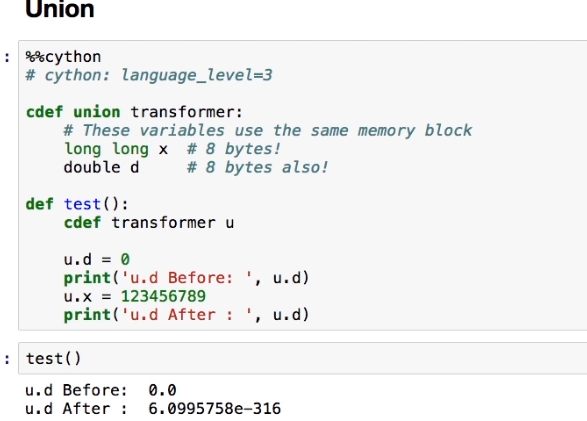

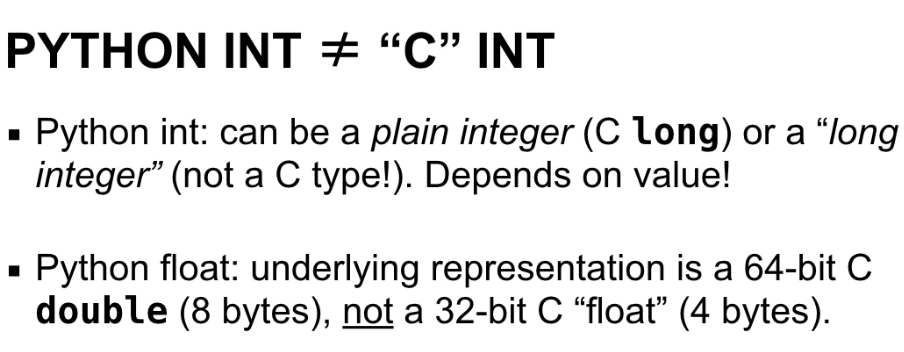

In [ ]:
%%cython 
def f1():
  # 2 bytes
  cdef short x = 1
  return x 
def f2(): 
  # 4 bytes 
  cdef int x = 1
  return x 
def f3():
  # 4 or 8 bytes, depends on your OS
  cdef long x = 1
  return x 
def f4():
# 8 bytes 
  cdef long long x = 1 
  return x 


In [ ]:
print(type(f1()))
print(type(f2()))
print(type(f3()))
print(type(f4()))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


In [ ]:
# Biggest unsigned short, 2 bytes => 16 bits
print(2**16 - 1)
# Biggest unsigned int, 4 bytes => 32 bits
print(2**32 - 1)
# Biggest unsigned long long, 8 bytes => 64 bits
print(2**64 - 1)

65535
4294967295
18446744073709551615


Python can handle very big numbers. Be careful passing big numbers into Cython functions.

In [ ]:
%%cython

cpdef can_handle_ushort(unsigned short x):
    return x

cpdef can_handle_uint(unsigned int x):
    return x

cpdef can_handle_ulong_long(unsigned long long x):
    return x

In [ ]:
can_handle_ushort(2**16-1)


65535

In [ ]:
can_handle_ushort(2**16)

OverflowError: ignored

In [ ]:
can_handle_uint(2**32-1)
can_handle_ulong_long(2**64-1)

18446744073709551615

In [ ]:
# gmpy2 lib

#memory views

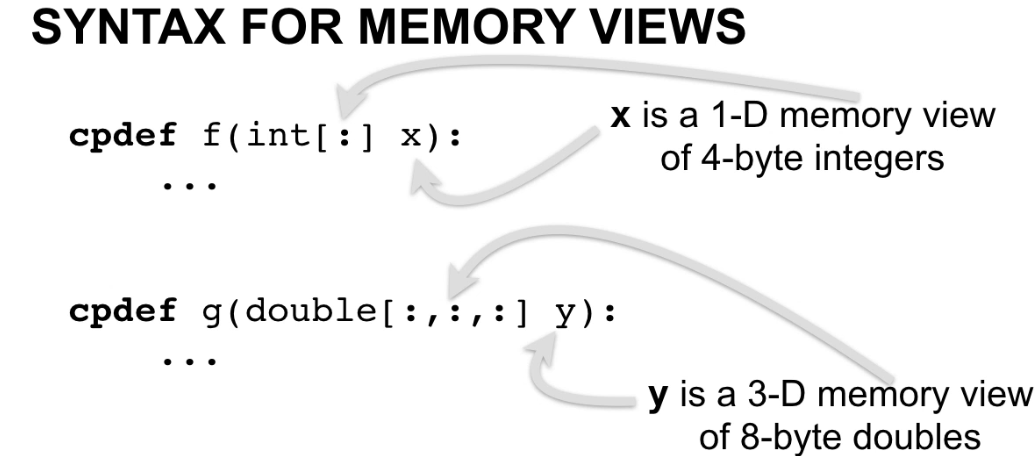